In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/diamonds-prices")

print("Path to dataset files:", path)
csv_file_path = os.path.join(path, "Diamonds Prices2022.csv")
df = pd.read_csv(csv_file_path)
df.head()




Path to dataset files: /kaggle/input/diamonds-prices


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 Question:Can we predict mental health issues using demographic, digital, and sleep variables? Which variables are the most important in predicting mental health issues?

In [ ]:
df.isna().sum() #nonavalues


,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:

df = df.rename(columns={'x': 'length(mm)', 'y': 'width(mm)', 'z': 'depth(mm)'})

df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


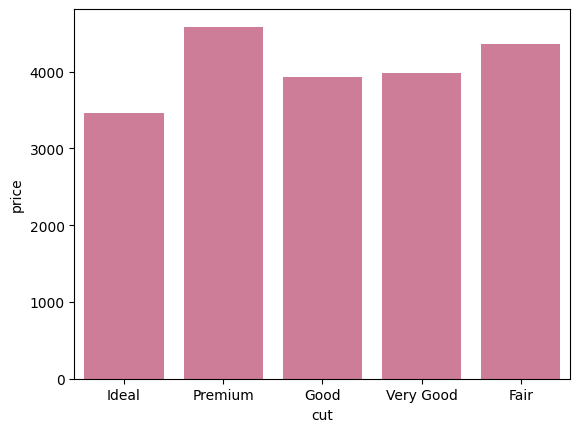

In [ ]:
sns.barplot(x='cut', y='price',color='palevioletred', data=df,errorbar=None,)
plt.show()



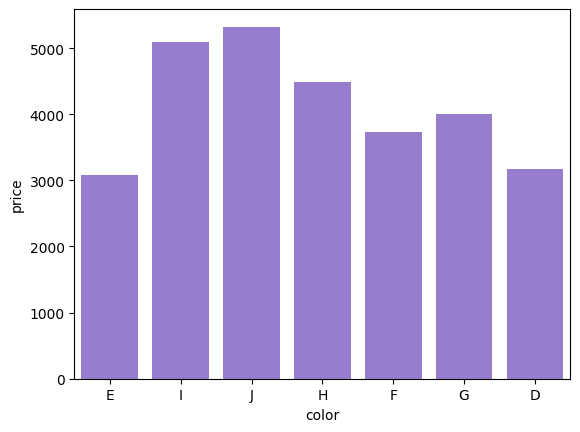

In [ ]:
sns.barplot(x='color', y='price',color='mediumpurple', data=df,errorbar=None,)
plt.show()


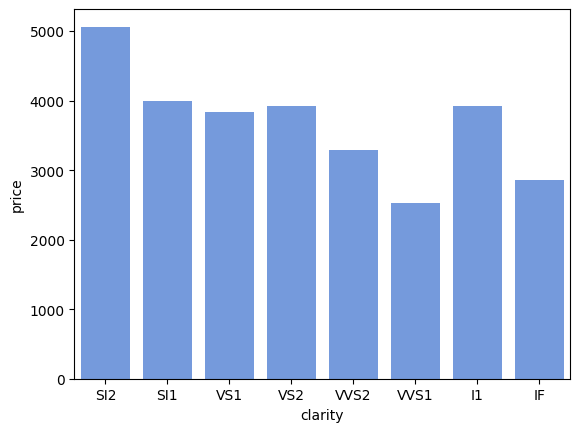

In [ ]:
sns.barplot(x='clarity', y='price',color='cornflowerblue', data=df,errorbar=None,)
plt.show()


<Axes: >

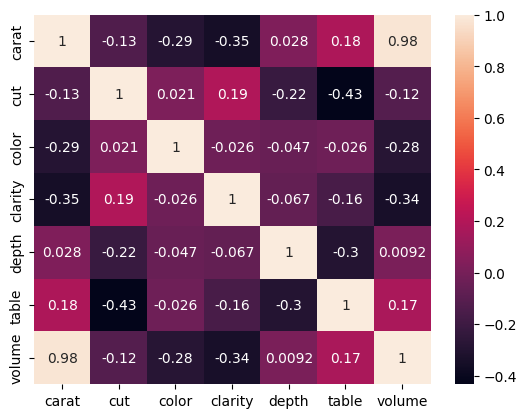

In [ ]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True)



In [ ]:
# Adding a volume column
df.drop(columns=['Unnamed: 0'], inplace=True)
df['volume'] = df['length(mm)'] * df['width(mm)'] * df['depth(mm)']
df.head()


,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm),volume
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


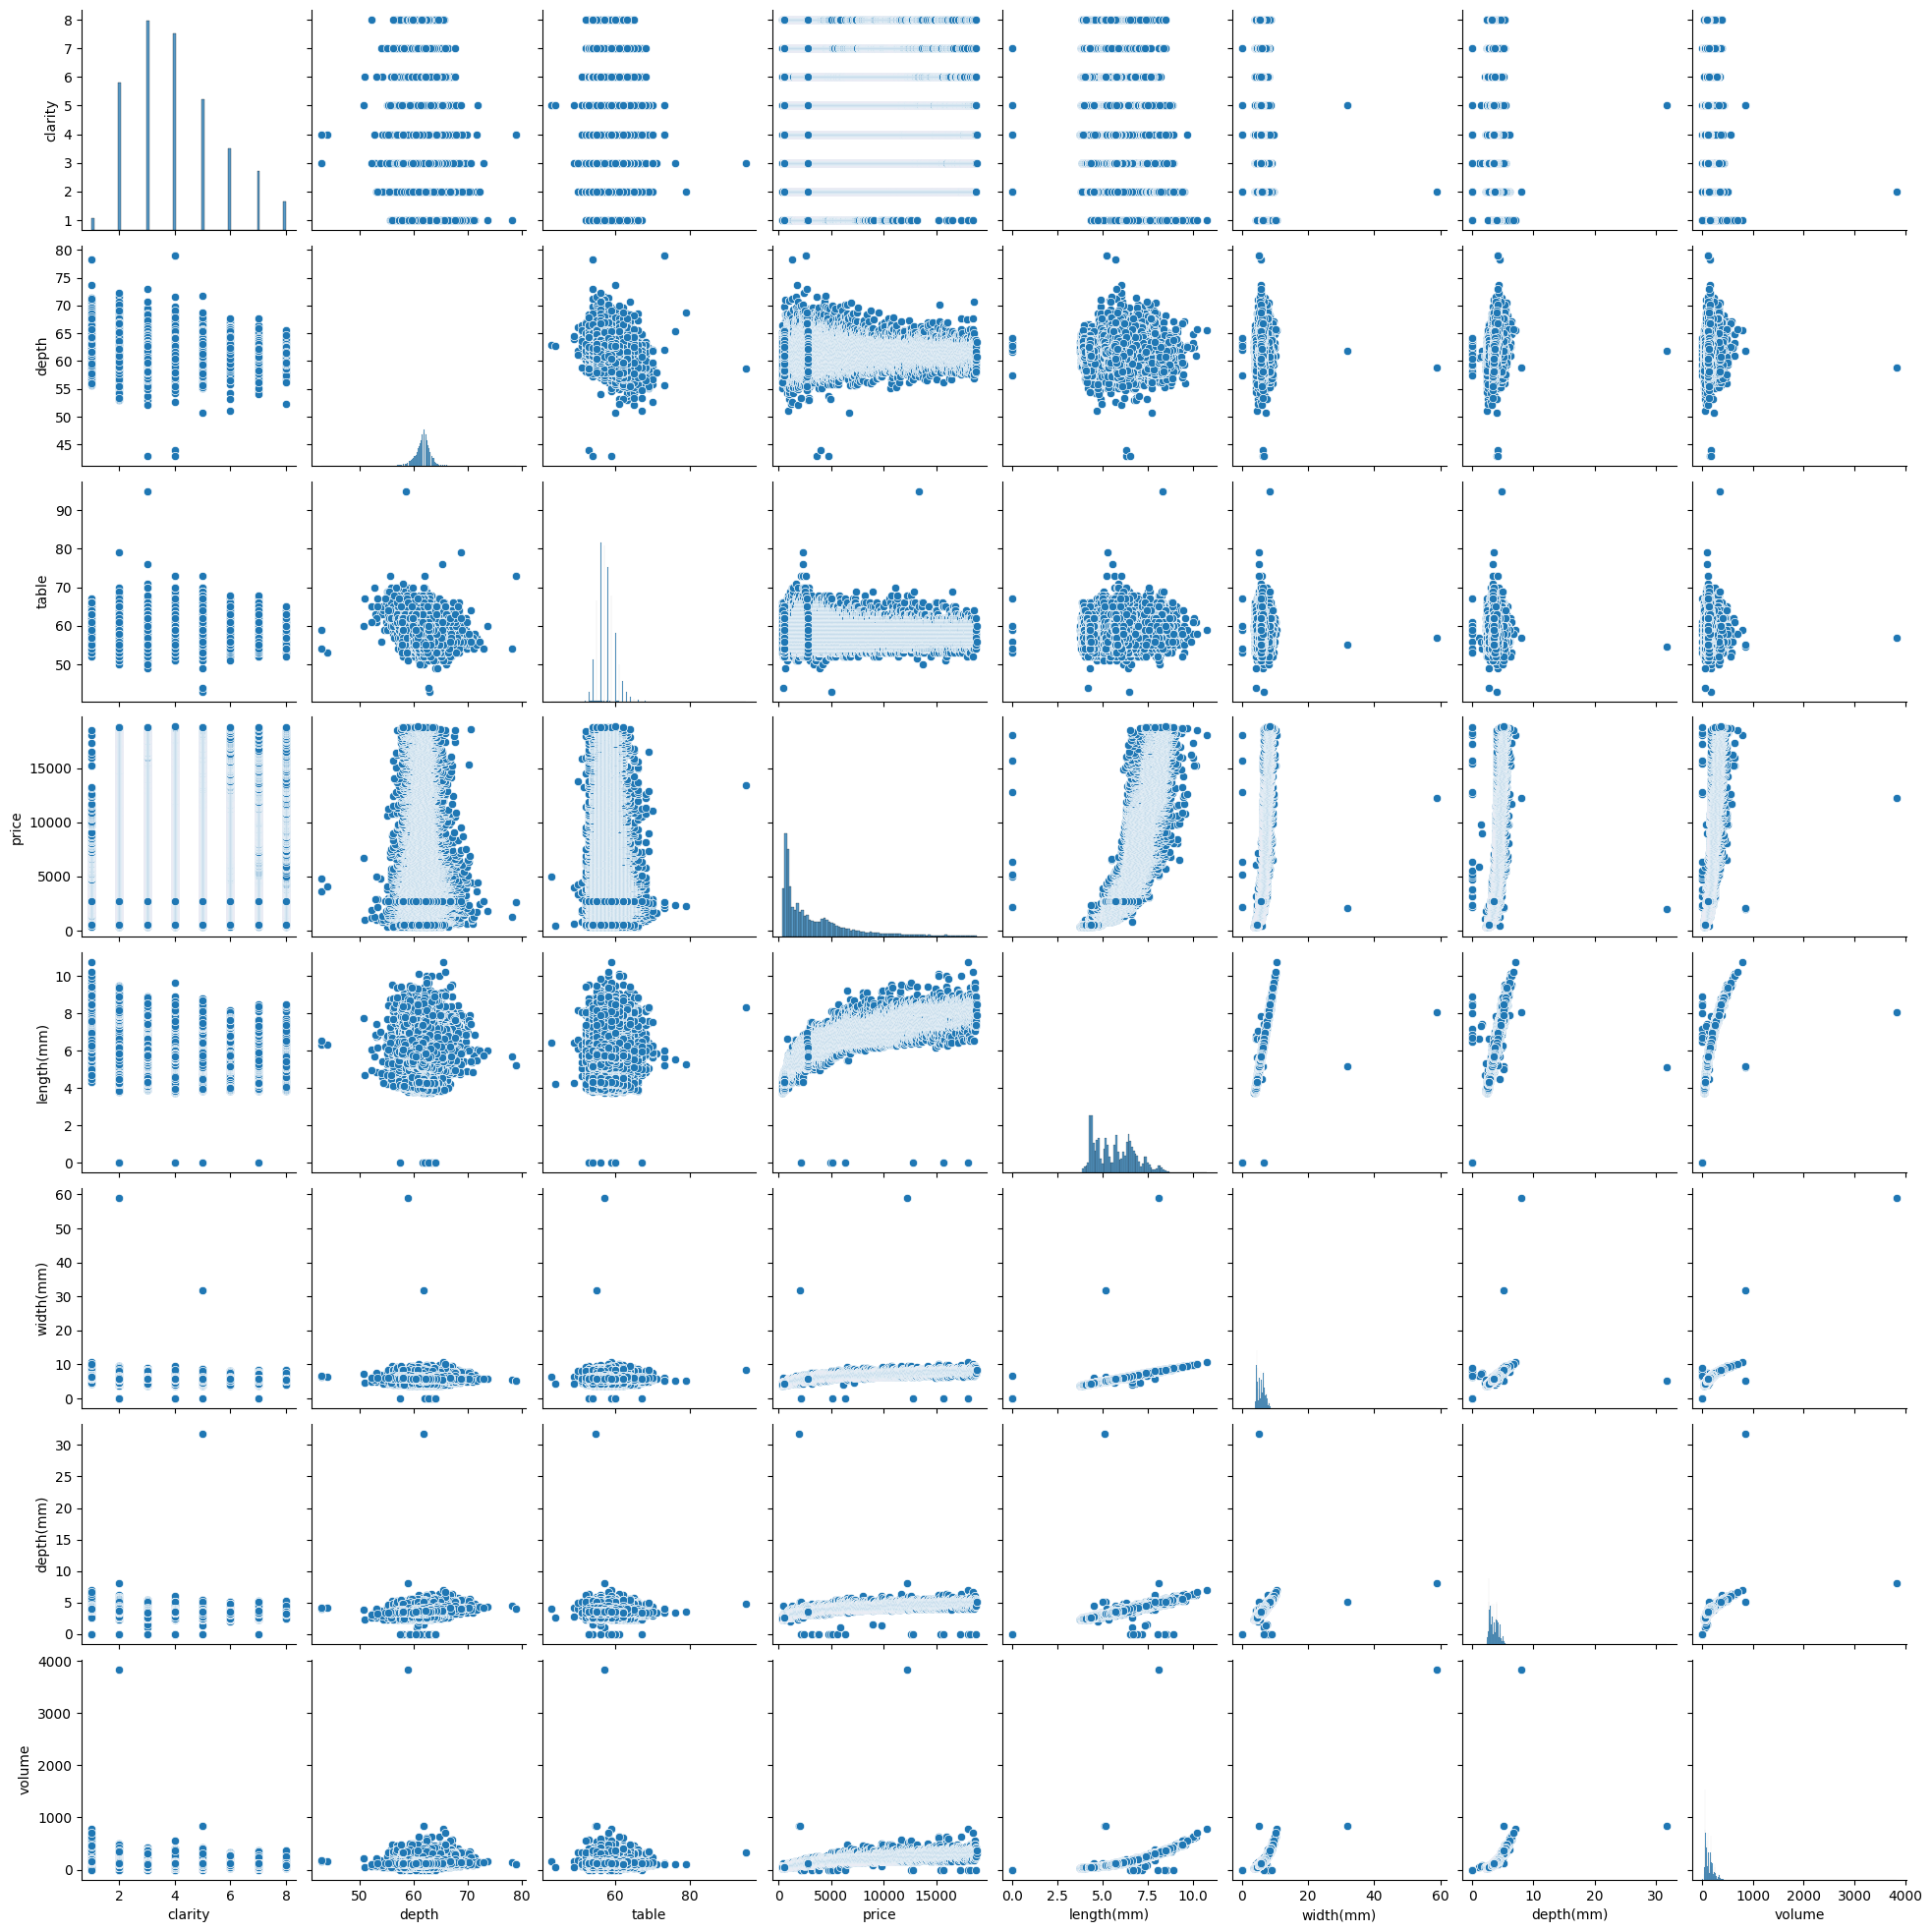

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df
sns.pairplot(df.iloc[:,3:])
plt.show()


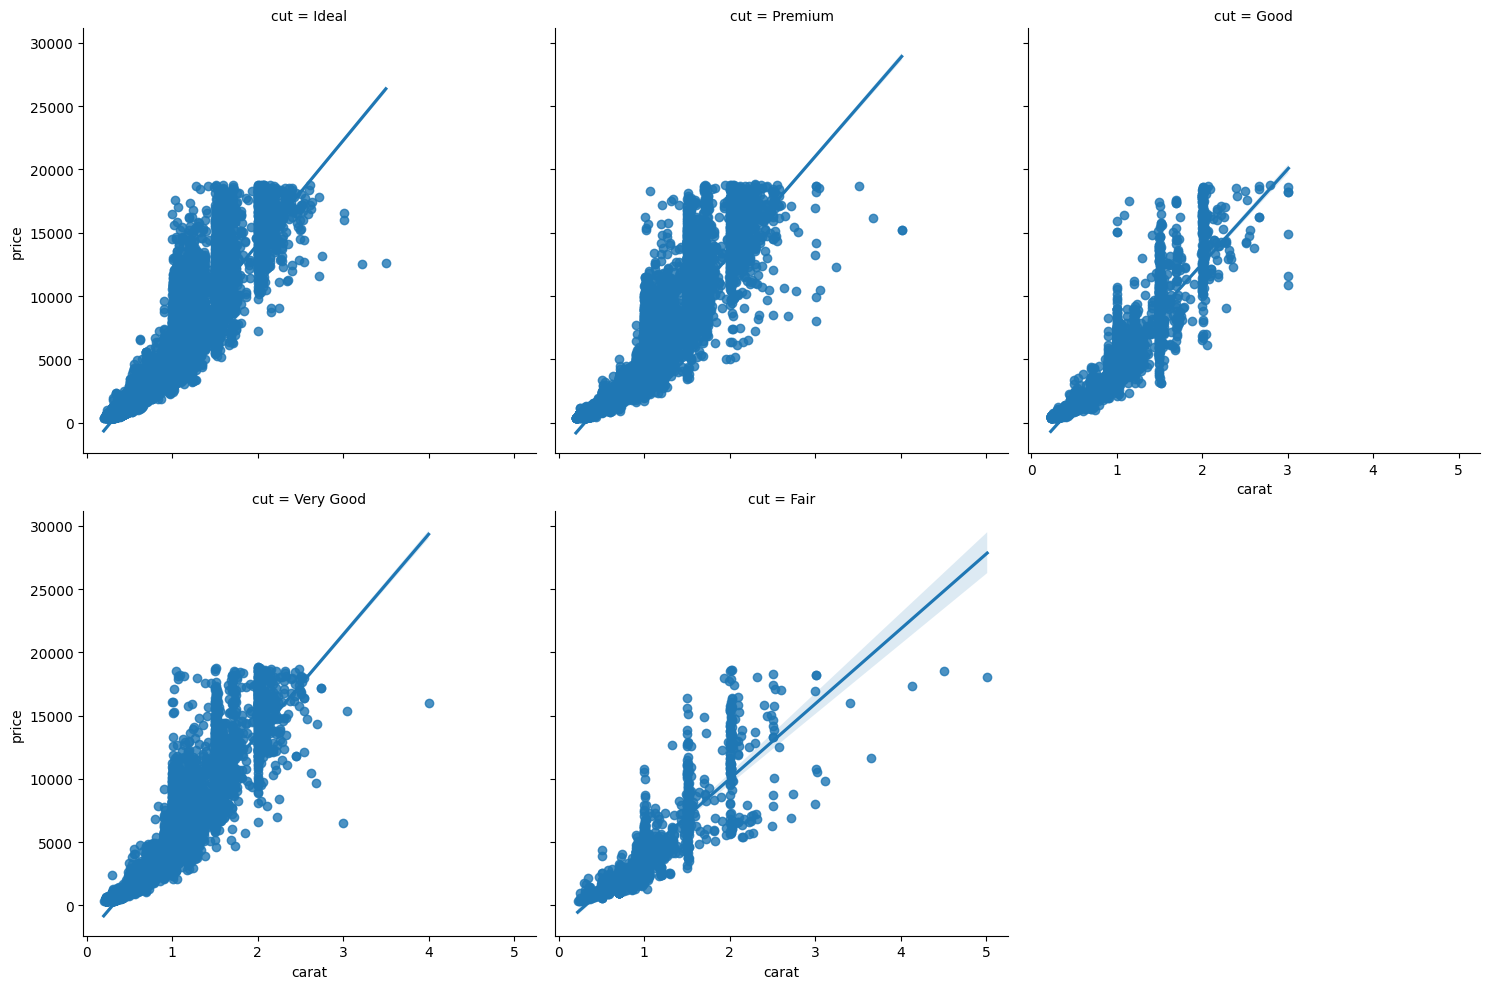

In [ ]:
sns.lmplot(x='carat', y='price',col='cut',col_wrap=3,data=df,fit_reg=True)
plt.show()

In [ ]:
# Taking unique values from 'cut'
df['cut'].unique()
#ranking cut
df['cut'] = df['cut'].str.strip()
map_cut = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
df['cut'] = df['cut'].map(map_cut)
df['color'] = df['color'].str.strip()
map_color = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
df['color'] = df['color'].map(map_color)
#Comparing cut and color to see if more color is more expensive
#converting string color to float
#color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
#df['color'] = df['color'].map(color_mapping)
#cut_color_corr = df['cut'].corr(df['color'])
#print(cut_color_corr)


In [ ]:
df['clarity'] = df['clarity'].str.strip()
map_clarity = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(map_clarity)
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm),volume
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


Creating price as the target variable (y)

In [ ]:
y = df['price']

In [ ]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
X = df[features]

y = df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Selecting Variables to use as predictors and splitting into training and testing set.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
logreg = LinearRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 1451708.3649481807
R-squared: 0.9070200875757503


60% accuracy getting this because we are predicting almost everyone to be healthy. 117 true negatives, 73 false negatives, 6 false positives, 4 true positives.

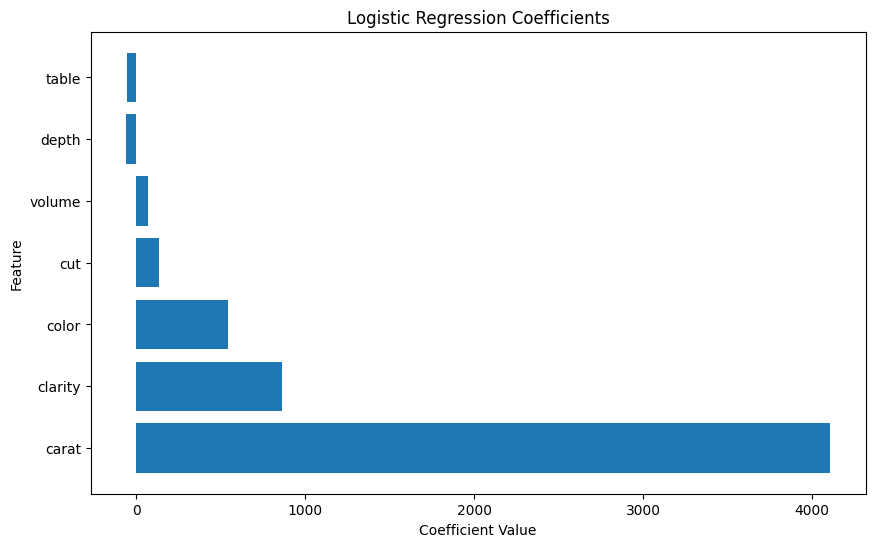

In [ ]:
# graph sorted coefficients from logistic regression
import matplotlib.pyplot as plt
import numpy as np
coefficients = logreg.coef_
feature_names = features
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Scaled Coefficients')
plt.show()



Sleeping alot does not cause mental health issues but they're correlated. The sleep hours and sleep quality are correlated with poor mental health. Being female is associated with lower mental health. There are many counterintuitive results which might be because our model has poor predictive power.

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 501674.20575483266
R-squared: 0.9678684611573107


56% accuracy, however we are at least predicting some people to have mental health issues. 83 true negatives, 49 false negatives, 40 false positives, 28 true positives.

In [ ]:
# prune the tree
dt_model_pruned = DecisionTreeRegressor(max_depth=3)
dt_model_pruned.fit(X_train, y_train)
y_pred = dt_model_pruned.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1777274.7673964833
R-squared: 0.8861680099003546


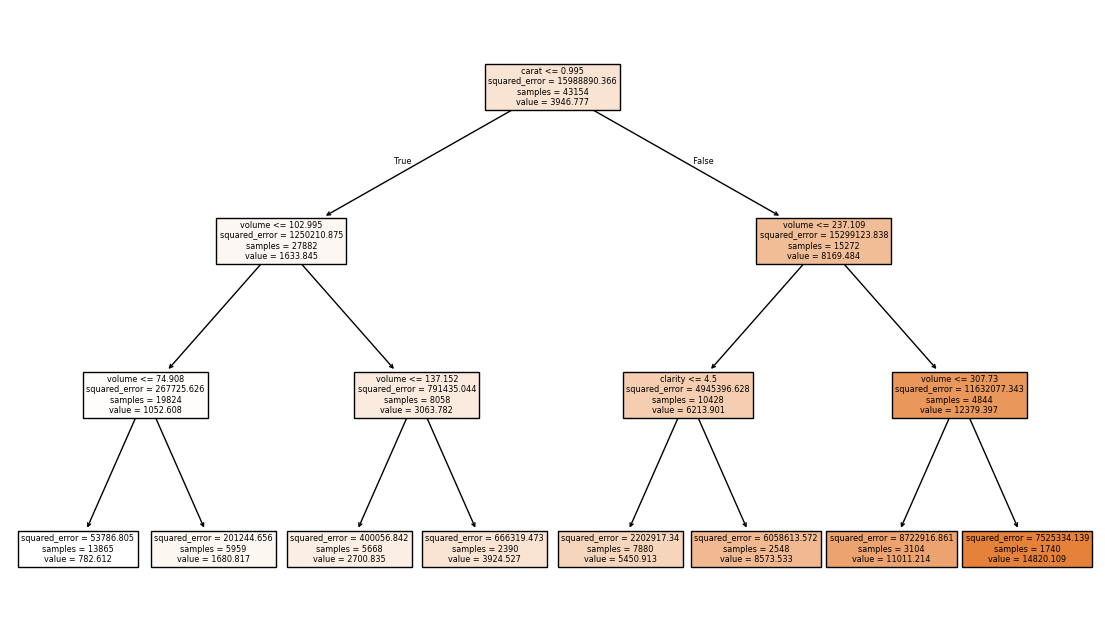

In [ ]:
#plot pruned tree
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 8))
plot_tree(dt_model_pruned, filled=True,feature_names=X_train.columns)
plt.show()



Value= predicted price of diamond.

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 286983.7186554229
R-squared: 0.9816190898447298


59% accuracy. Hyperparameter tuning needs to be done.

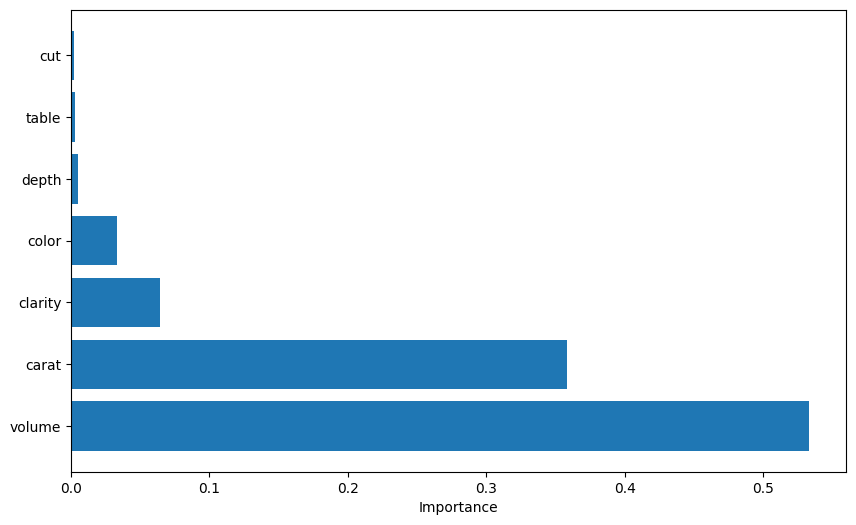

In [ ]:
# Create features importances plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
feature_names_sorted = [feature_names[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names_sorted)), importances[indices], align='center')
plt.yticks(range(len(feature_names_sorted)), feature_names_sorted)
plt.xlabel('Importance')
plt.show()


Daily screen time and physical activity seem to be most important.

In [ ]:
# Xg boost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 294681.8125
R-squared: 0.9811260104179382


57% accuracy with xg boost model. Harder to predict if screentime actually affects mental health.

In [ ]:
# create baseline model using majority class
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 15618069.344619824
R-squared: -0.000315734868997275


This is the baseline model where we assigned each participant to the majority class and calculated metrics. All models, in theory, should be able to beat this; however, the models that ran above did not.

In [ ]:
map_cut = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
df['cut'] = df['cut'].map(map_cut)

map_clarity = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(map_clarity)

df.head()


In [ ]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length(mm)', 'width(mm)', 'depth(mm)']
X = df[features]

y = df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)